In [3]:
import pandas as pd
import pyodbc
from datetime import datetime, date
import numpy as np
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')

conn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=mskl-db-server.database.windows.net;"
            "Database=tigeranalytics;"
            "UID=tigerlearner;"
            "PWD=AsDf1234;")
conn = pyodbc.connect(conn_str)

In [4]:
customer_table = pd.read_sql("""select * from marketing_customers_ml""", conn)
order_df = pd.read_sql("select * from marketing_orders_ml", conn)
order_table = order_df.copy()
transactions_table = pd.read_sql("select * from marketing_transactions_ml", conn)

**Saving Table data into csv files**

In [5]:
# customer_table.to_csv('customer.csv', index=False)
# order_table.to_csv('order.csv', index=False)
# transactions_table.to_csv('transactions.csv', index=False)

# customer_table = pd.read_csv('customer.csv')
# order_df = pd.read_csv('order.csv')
# transactions_table = pd.read_csv('transactions.csv')

In [6]:
# Reading Campaign data 
campaign_data = pd.read_csv('campaign_data.csv')
campaign_data.head()

,customer_id,treatment,conversion,visit,exposure,class
0,IN-Hung-15894,1,0,0,0,Lost Cause
1,IN-Jais-17512,1,0,0,0,Lost Cause
2,IN-Akle-17369,1,0,0,0,Lost Cause
3,IN-Deol-71539,1,0,0,0,Lost Cause
4,IN-Puja-7705,1,0,0,0,Lost Cause


In [7]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104064 entries, 0 to 104063
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  104064 non-null  object
 1   treatment    104064 non-null  int64 
 2   conversion   104064 non-null  int64 
 3   visit        104064 non-null  int64 
 4   exposure     104064 non-null  int64 
 5   class        104064 non-null  object
dtypes: int64(4), object(2)
memory usage: 4.8+ MB


In [8]:
campaign_data['class'].unique()

array(['Lost Cause', 'Persuadables', 'Sure Thing', 'Dont Disturb'],
      dtype=object)

In [9]:
print("customer_table info ")
print(customer_table.info())

customer_table info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104064 entries, 0 to 104063
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   name         104064 non-null  object
 1   city         104064 non-null  object
 2   country      104064 non-null  object
 3   customer_id  104064 non-null  object
 4   phn_no       104064 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ MB
None


In [10]:
df = customer_table.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104064 entries, 0 to 104063
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   name         104064 non-null  object
 1   city         104064 non-null  object
 2   country      104064 non-null  object
 3   customer_id  104064 non-null  object
 4   phn_no       104064 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ MB


In [11]:
print("order_table info ")
print(order_table.info())

order_table info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615083 entries, 0 to 615082
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       615083 non-null  object
 1   customer_id                    615083 non-null  object
 2   Product_Name                   615063 non-null  object
 3   category_name                  614919 non-null  object
 4   order_purchase_date            615083 non-null  object
 5   order_estimated_delivery_date  615083 non-null  object
 6   order_customer_delivery_date   615083 non-null  object
 7   status                         615068 non-null  object
dtypes: object(8)
memory usage: 37.5+ MB
None


* There are Null value in 'Product_Name', 'category_name' and 'status' columns


In [12]:
# Replacing all '\N' and 'Nan' with None, these values most probabily are Null values 
order_table.replace('\\N',None,inplace=True)
order_table.replace(np.nan,None,regex=True, inplace=True)

In [13]:
# Checking if '\N' Values are replaced with Null or not 
order_table.category_name.unique()

array(['Beauty & Grooming', "Women's Fashion", 'Mobiles & Tablets',
       'Appliances', "Men's Fashion", 'Others', 'Home & Living',
       'Soghaat', 'Computing', 'Health & Sports', 'Kids & Baby',
       'Entertainment', 'Superstore', None, 'School & Education', 'Books'],
      dtype=object)

Checking Unique values and their counts in category_name column

In [14]:
order_table.category_name.value_counts()

Mobiles & Tablets     121735
Men's Fashion          97591
Women's Fashion        66580
Appliances             53948
Superstore             44522
Beauty & Grooming      44080
Soghaat                35467
Others                 29382
Home & Living          28713
Entertainment          27276
Health & Sports        18285
Kids & Baby            17416
Computing              16559
School & Education      3502
Books                   1870
Name: category_name, dtype: int64

* None values in category_name column replace with 'Others' category 

In [15]:
order_table.status.value_counts()

complete          250084
canceled          208141
received           79459
order_refunded     63350
refund              8750
cod                 2859
paid                1159
closed              1072
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
Name: status, dtype: int64

* None values in status column will replace with 'complete' status 


In [16]:
# Filling None values in category_name column with "Others" category
order_table['category_name'].fillna('Others',inplace=True)

# Filling None values in Product_Name column with most frequent Product_Name

order_table['Product_Name'].fillna(order_table['Product_Name'].mode()[0], inplace=True)

# Replacing 'None' status values in status column as 'complete'
order_table['status'].fillna('complete', inplace=True)



In [17]:
order_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615083 entries, 0 to 615082
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       615083 non-null  object
 1   customer_id                    615083 non-null  object
 2   Product_Name                   615083 non-null  object
 3   category_name                  615083 non-null  object
 4   order_purchase_date            615083 non-null  object
 5   order_estimated_delivery_date  615083 non-null  object
 6   order_customer_delivery_date   615083 non-null  object
 7   status                         615083 non-null  object
dtypes: object(8)
memory usage: 37.5+ MB


In [18]:
transactions_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615083 entries, 0 to 615082
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         615083 non-null  object 
 1   customer_id      615083 non-null  object 
 2   TRANS_ID         615083 non-null  object 
 3   price            615083 non-null  float64
 4   discount_amount  615081 non-null  float64
 5   qty_ordered      615083 non-null  int64  
 6   grand_total      615083 non-null  float64
 7   Payment_method   615083 non-null  object 
 8   Trans_date       615083 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 42.2+ MB


* Only 'discount_column' have Null value present. 

In [19]:
transactions_table['discount_amount'] = transactions_table['discount_amount'].fillna(transactions_table.groupby("customer_id")['discount_amount'].transform('mean'))

In [20]:
transactions_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615083 entries, 0 to 615082
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         615083 non-null  object 
 1   customer_id      615083 non-null  object 
 2   TRANS_ID         615083 non-null  object 
 3   price            615083 non-null  float64
 4   discount_amount  615083 non-null  float64
 5   qty_ordered      615083 non-null  int64  
 6   grand_total      615083 non-null  float64
 7   Payment_method   615083 non-null  object 
 8   Trans_date       615083 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 42.2+ MB


**Now Our All dataframes have no null values**

count      104064.0
mean        50428.0
std        147715.0
min            50.0
25%         15132.0
50%         32445.0
75%         63603.0
max      18043449.0
Name: grand_total, dtype: float64


<AxesSubplot: ylabel='Frequency'>

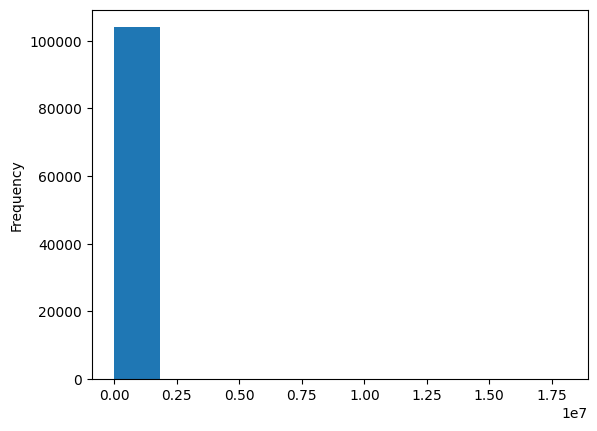

In [21]:
print(transactions_table.groupby('customer_id').grand_total.sum().describe().round())#.quantile([0.25,0.5,0.75]))
transactions_table.groupby('customer_id').grand_total.sum().plot.hist()

* In Grand Total column some data points value is too high, so checking in 'price' and 'qty_ordered' column for outliers. 

**price column**

count     104064.00
mean       37001.78
std        39602.97
min            1.00
25%         8288.00
50%        24367.00
75%        50063.75
max      1086342.88
Name: price, dtype: float64


<AxesSubplot: >

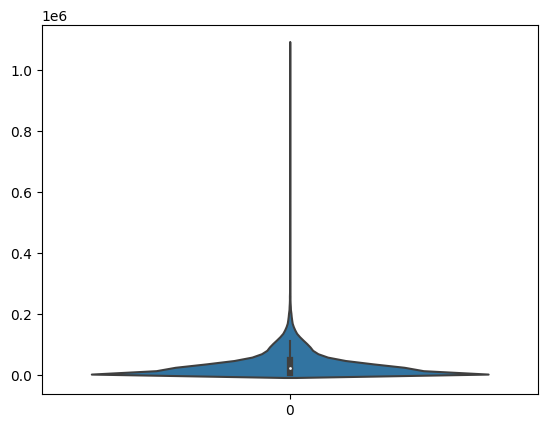

In [22]:
print(transactions_table.groupby('customer_id').price.sum().describe().round(2))
sns.violinplot(transactions_table.groupby('customer_id').price.sum())


Percentile value of top product  330499.0
AxesSubplot(0.125,0.11;0.775x0.77)


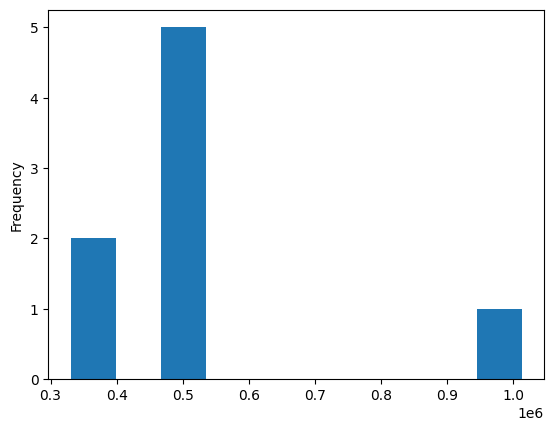

In [23]:
val = np.quantile(transactions_table.price, 0.99999) #Checking for top 0.00001 percent product's price
print('Percentile value of top product ',val)
print(transactions_table[transactions_table.price>=val].price.plot.hist()) #.merge(order_table, how='inner', on='order_id')



In [24]:
val = np.quantile(transactions_table.price, 0.99999)
transactions_table[transactions_table.price>=val].merge(order_table, how='inner', on='order_id')#.groupby('Product_Name').Product_Name.count().sort_values()


,order_id,customer_id_x,TRANS_ID,price,discount_amount,qty_ordered,grand_total,Payment_method,Trans_date,customer_id_y,Product_Name,category_name,order_purchase_date,order_estimated_delivery_date,order_customer_delivery_date,status
0,EKGEXF-1863170,IN-Beta-47094,T0DP14DMD60L6LP,479000.000,0.0,1,479000.000,COD,2019-03-18,IN-Beta-47094,yamaha_EF12000E,Appliances,2019-03-18,2019-07-05,2019-07-08,canceled
1,AKWGST-1467390,IN-Srin-24405,T121XHULD3J3ZGZ,330499.000,0.0,1,330499.000,COD,2020-09-13,IN-Srin-24405,"samsung_SUHD TV? KS 8000 60""",Entertainment,2020-09-13,2020-12-02,2020-12-04,canceled
2,FXBXGM-2274570,IN-Dals-57407,T8PYGJB7QQE7ID5,479000.000,0.0,1,479000.000,Online/Card,2020-08-09,IN-Dals-57407,yamaha_EF12000E,Appliances,2020-08-09,2020-11-03,2020-10-31,canceled
3,KDPIJW-3520352,IN-Barb-47142,TCNESW77CGWMSWY,479000.000,0.0,1,479000.000,Online/Card,2017-03-21,IN-Barb-47142,yamaha_EF12000E,Appliances,2017-03-21,2017-05-30,2017-05-30,order_refunded
4,NVNNII-1035643,IN-Kend-78738,TJH3K8C3SFTP86Z,515975.000,2000.0,1,513975.000,COD,2021-03-17,IN-Kend-78738,ENTSAM59B7C1FA12478,Entertainment,2021-03-17,2021-06-26,2021-06-16,canceled
5,CQYMFK-2075984,IN-Soja-2660,TL6MJ9XQQGKMXY2,1012625.875,0.0,1,1012625.875,COD,2020-10-19,IN-Soja-2660,BAGGEM5A7038AC06C9A,Beauty & Grooming,2020-10-19,2021-01-07,2020-12-29,canceled
6,AREMEC-1097086,IN-Bhay-83761,TTZNT504XVKTXL6,479000.000,0.0,1,479000.000,COD,2014-10-18,IN-Bhay-83761,yamaha_EF12000E,Appliances,2014-10-18,2015-02-12,2015-02-02,canceled
7,YFGYFH-1951138,IN-Srin-58403,TY9C301N9O89OLN,330499.000,0.0,1,330499.000,Online/Card,2020-07-26,IN-Srin-58403,Samsung_60KS8000,Entertainment,2020-07-26,2020-08-11,2020-08-21,canceled


* There are some products whose price are too high, but those are from the Appliance and Entertainment category and it would be possible that these are expensive appliances. 

**qty_ordered column**

count    104064.00
mean         38.66
std         311.50
min           1.00
25%           9.00
50%          17.00
75%          33.00
max       47056.00
Name: qty_ordered, dtype: float64


<AxesSubplot: >

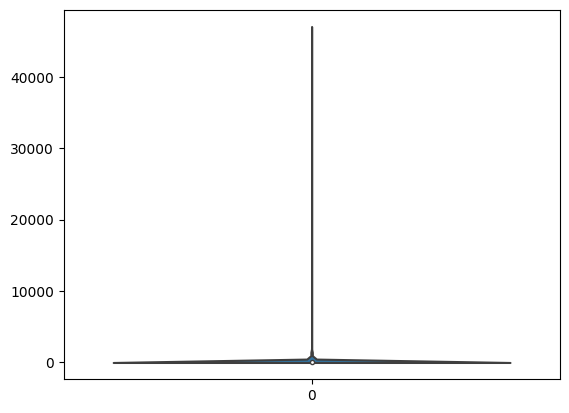

In [25]:
print(transactions_table.groupby('customer_id').qty_ordered.sum().describe().round(2))
sns.violinplot(transactions_table.groupby('customer_id').qty_ordered.sum())

In [26]:
val = np.quantile(transactions_table.qty_ordered, 0.99999)
transactions_table[transactions_table.qty_ordered>=val]#.merge(order_table, how='inner', on='order_id')#.groupby('Product_Name').Product_Name.count().sort_values()


,order_id,customer_id,TRANS_ID,price,discount_amount,qty_ordered,grand_total,Payment_method,Trans_date
120866,TIEJOX-2414191,IN-Domb-45305,T72WNG8UM2SYQN7,1.0,1650.000000,30743,29093.000000,Online/Card,2021-08-07
128752,JEFJGX-2888854,IN-Saha-50071,T7JSDSI8O9AWF7A,1.0,0.000000,19151,19151.000000,COD,2019-10-28
397198,OHHIIT-2974444,IN-Robe-98741,TN7TPZRF1LAA66H,1.0,0.000000,33041,33041.000000,COD,2014-04-22
537317,VAUQCO-2068280,IN-Alwa-51949,TVFJJA33KKZNCXO,2.0,7627.430176,47039,86450.570312,Online/Card,2014-07-01
557168,RHCKVA-2009899,IN-Akle-46640,TWLT6RCOX2Q5FYL,1.0,0.000000,25901,25901.000000,Online/Card,2014-09-25
576344,WWPUVY-4481779,IN-Peri-31921,TXQEZDN7O1260YE,2.0,0.000000,30526,61052.000000,COD,2019-05-22
600783,FSRRFN-4155906,IN-Gari-50312,TZ5P62N99RSP9SV,1.0,0.000000,31970,31970.000000,COD,2020-08-17


* there are some rows where qty_ordered are too high (e.g. in thousands) but there prices are '1.0' or '2.0', so it is possible that this are small products ordered in bulk.

* Finally, even if some data rows seems having too big values, but from the data analysis and visualization, it's clear that those products are legit. 
* Hence no need to treat them as outliers or drop them. 

* Finally We get three prepared datasets: 
    * customer_table
    * order_table
    * transactions_table